# Analyze Norwegian GDP Data
* 16-06-2019
* Joakim Blix Prestmo
* ECN222 - Macroeconomics II
* Norwegian University of Life Science

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
# Open data from Statistics Norway, www.ssb.no
# Quarterly national account: 
# https://www.ssb.no/en/statbank/list/knr

dataset = "http://www.ssb.no/statbank/sq/10010628/"
df = pd.read_excel(dataset, skiprows=3, skipfooter=48)


In [3]:
df.tail(10)


,Unnamed: 0,Konsum i husholdninger og ideelle organisasjoner,Konsum i offentlig forvaltning,Bruttoinvestering i fast realkapital,Lagerendring og statistiske avvik,Eksport i alt,Import i alt,"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi"
155,2016K4,356335,191566,201157,19006,281231,264693,784704,678840
156,2017K1,358822,192527,203765,21954,274978,263443,788709,684648
157,2017K2,360039,193529,205514,23753,276347,265059,794220,689734
158,2017K3,363221,194922,204036,26910,274388,265298,798283,693716
159,2017K4,365934,197553,205451,33114,270933,272860,800232,699352
160,2018K1,365965,196858,196776,35840,270139,261927,803756,703218
161,2018K2,370480,196891,205946,28963,274558,269764,807187,708246
162,2018K3,370284,196844,209917,27649,274677,268538,810942,710008
163,2018K4,371976,197152,214657,32631,272745,273356,815921,717948
164,2019K1,373833,199131,211997,31468,278747,279971,815323,720176


In [4]:
# Make a timedata index
# remove first column
# df = df.drop(['Unnamed: 0'], axis=1)
# add index, using pandas.period_range, 
df.index = pd.Index(pd.period_range('1978-01', periods=165, freq='Q'))
# remember to update no. of periods every quarter. 

In [ ]:
# Rename columns?
#df.columns['Consumption', 'PublicConsumption', 'Investments', 'Error', 'Exports', 'Imports', 'GDP', 'GDPMainland']

# Figures


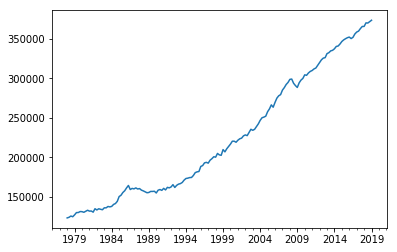

In [5]:
# Simple time series plot
df['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.show()

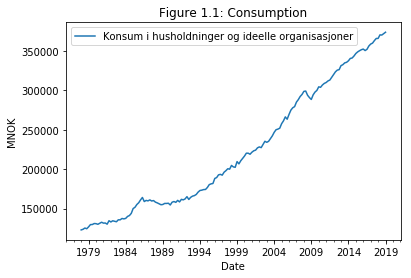

In [6]:
# Add title and legend
df['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')

# save figure and use in presentataion etc. 
folder ='C:\\Users\\username\\Documents\\GitHub\\MacroeconomicsII\\'
filename = folder + 'consumption1.png'
plt.savefig(filename)
plt.show()


# Variables engineering

In [12]:
# Create growth rates:
# df[log_C] = ...
df['Dc'] = np.log(df['Konsum i husholdninger og ideelle organisasjoner']).diff(4)
Ddf = df.diff(4) 
# alternative way to make absolute diffs of all variables in a dataframe
 
df['DC_Y'] = df['Konsum i husholdninger og ideelle organisasjoner'].diff(4)/(df['Bruttonasjonalprodukt Fastlands-Norge, markedsverdi'].shift(4))
# Remember that using difference of the logarithm is an approximation that works as long as the relavtive change is small
# Note small letters for logarithms

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [10]:
# Figure with title and legend
Ddf['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.2: Yearly change in consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')

# save figure and use in presentataion etc. 
filename = folder + 'consumption2.png'
plt.savefig(filename)
plt.show()

NameError: name 'Ddf' is not defined

In [ ]:
# Figure with title and legend
df['DC_Y'].plot()
plt.title("Figure 1.3: Contributions from consumption to GDP-growth")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('Percentage points')

# save figure and use in presentataion etc. 
filename = folder + 'consumption3.png'
plt.savefig(filename)
plt.show()


In [ ]:
# df['2008Q1':'2010Q4']

In [ ]:
# Make main components of GDP as a share of GDP
df['C_Y'] = df['Konsum i husholdninger og ideelle organisasjoner']/df['Bruttonasjonalprodukt, markedsverdi']
df['G_Y'] = df['Konsum i offentlig forvaltning']/df['Bruttonasjonalprodukt, markedsverdi']
df['I_Y'] = df['Bruttoinvestering i fast realkapital']/df['Bruttonasjonalprodukt, markedsverdi']
df['NX'] = df['Eksport i alt']-df['Import i alt']
df['NX_Y'] = df['NX']/df['Bruttonasjonalprodukt, markedsverdi']

In [ ]:
# Find mean of main compontents of GDP as a share of GDP
df.mean()
# or
df.describe()
# or
maincomp = ['C_Y', 'G_Y', 'I_Y', 'NX_Y']
df[maincomp].mean()
#need a filter for year?
print('Main components share of GDP'), print(df[maincomp]['2019Q1'].mean())
